# MAF To Variant Classification Example
This notebook tests the `read_maf` method from the `pyMut.input` module that generates a `PyMutation` object.
The `read_maf` function now includes automatic caching functionality for improved performance.

In [1]:
import sys, os
import pyMut # Import pyMut package

# Determinate the project root using the location of the pyMut package
project_root = os.path.abspath(os.path.join(os.path.dirname(pyMut.__file__), '..', '..'))

# Verify that 'src' is in sys.path
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

print('✅ PYTHONPATH configured with:', src_path)
print('✅ Project root:', project_root)

✅ PYTHONPATH configured with: /home/luisruimore/Escritorio/TFG/src
✅ Project root: /home/luisruimore/Escritorio/TFG


In [2]:
# Ruta al archivo MAF
maf_path = os.path.join(
    project_root,
    'src', 'pyMut', 'data', 'examples', 'tcga_laml.maf.gz'
)
print(f'📂 Cargando archivo: {maf_path}')

📂 Cargando archivo: /home/luisruimore/Escritorio/TFG/src/pyMut/data/examples/tcga_laml.maf.gz


In [3]:
from pyMut.input import read_maf
import time

# Leer el archivo MAF y generar el objeto PyMutation
print("Primera lectura (creará cache)...")
start_time = time.time()
py_mutation = read_maf(maf_path, assembly="37")
first_read_time = time.time() - start_time
print(f"Primera lectura completada en {first_read_time:.3f} segundos")

# Mostrar el objeto resultante
print(py_mutation)

2025-07-30 23:06:32,032 | INFO | pyMut.input | Starting MAF reading: /home/luisruimore/Escritorio/TFG/src/pyMut/data/examples/tcga_laml.maf.gz
2025-07-30 23:06:32,033 | INFO | pyMut.input | Loading from cache: /home/luisruimore/Escritorio/TFG/src/pyMut/data/examples/.pymut_cache/tcga_laml.maf_f0e5e43ebc73d49a.parquet
2025-07-30 23:06:32,060 | INFO | pyMut.input | Cache loaded successfully in 0.03 seconds


Primera lectura (creará cache)...
Primera lectura completada en 0.029 segundos


In [4]:
# Demostrar la funcionalidad de cache
print("Segunda lectura (usará cache)...")
start_time = time.time()
py_mutation_cached = read_maf(maf_path, assembly="37")
second_read_time = time.time() - start_time
print(f"Segunda lectura completada en {second_read_time:.3f} segundos")

speedup = first_read_time / second_read_time if second_read_time > 0 else float('inf')
print(f"Aceleración con cache: {speedup:.2f}x")
print(f"Formas de datos coinciden: {py_mutation.data.shape == py_mutation_cached.data.shape}")

2025-07-30 23:06:32,076 | INFO | pyMut.input | Starting MAF reading: /home/luisruimore/Escritorio/TFG/src/pyMut/data/examples/tcga_laml.maf.gz
2025-07-30 23:06:32,077 | INFO | pyMut.input | Loading from cache: /home/luisruimore/Escritorio/TFG/src/pyMut/data/examples/.pymut_cache/tcga_laml.maf_f0e5e43ebc73d49a.parquet
2025-07-30 23:06:32,095 | INFO | pyMut.input | Cache loaded successfully in 0.02 seconds


Segunda lectura (usará cache)...
Segunda lectura completada en 0.020 segundos
Aceleración con cache: 1.47x
Formas de datos coinciden: True


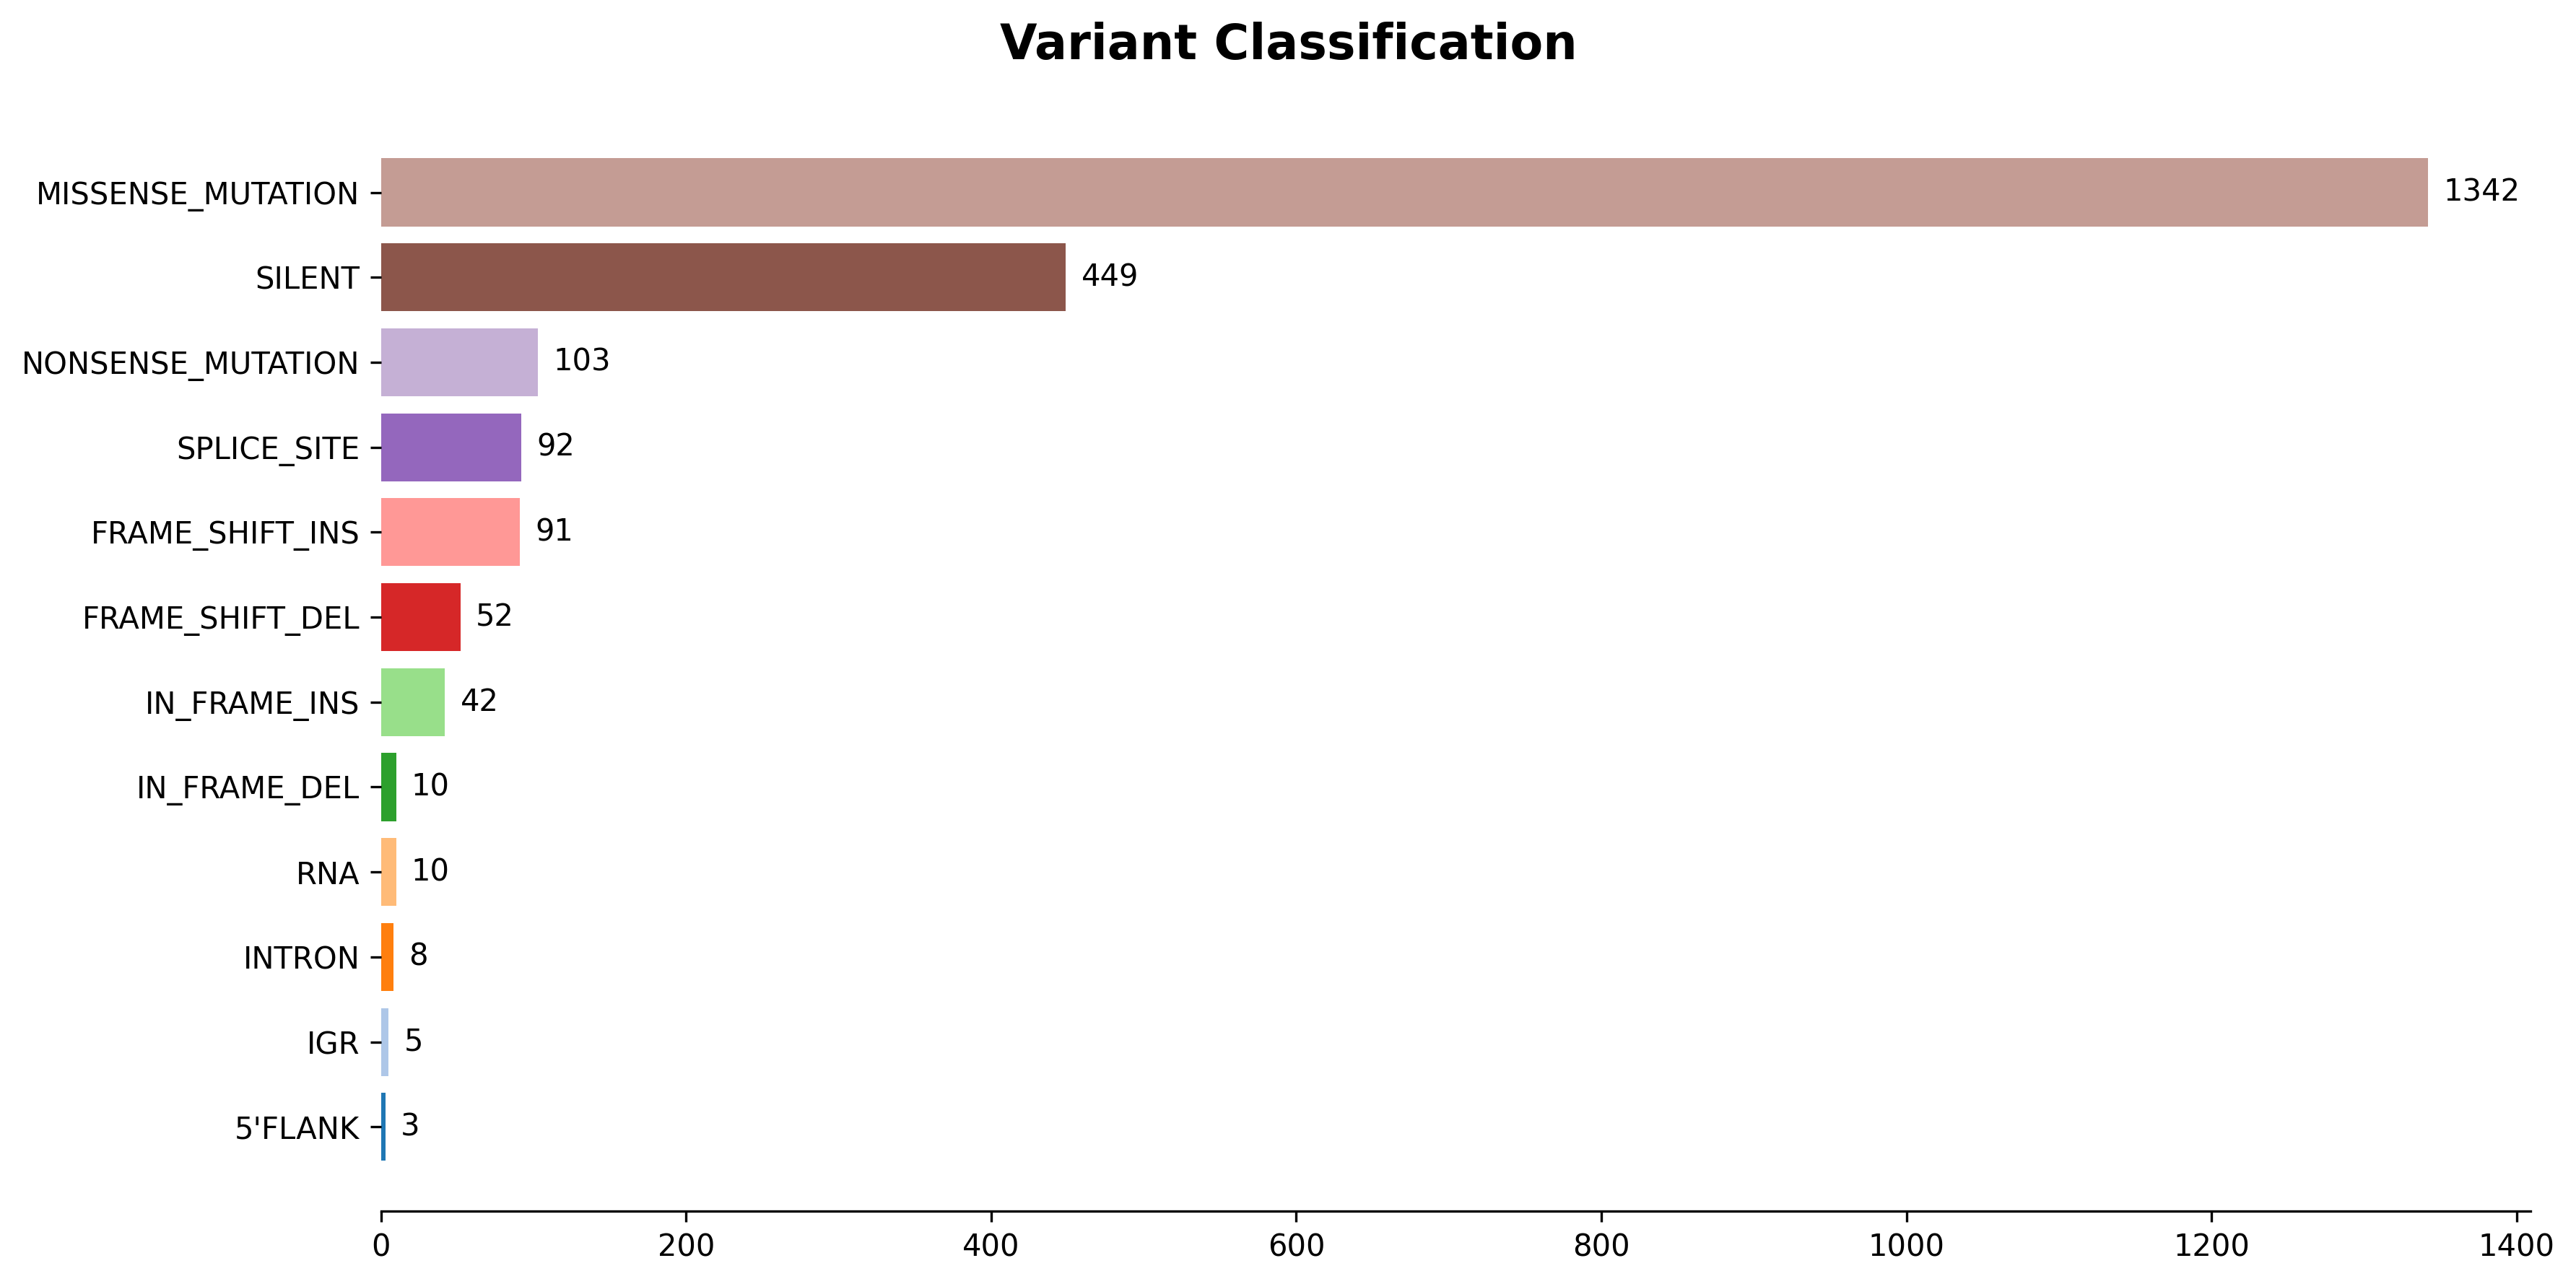

In [5]:
py_mutation.configure_high_quality_plots()

py_mutation.variant_classification_plot()

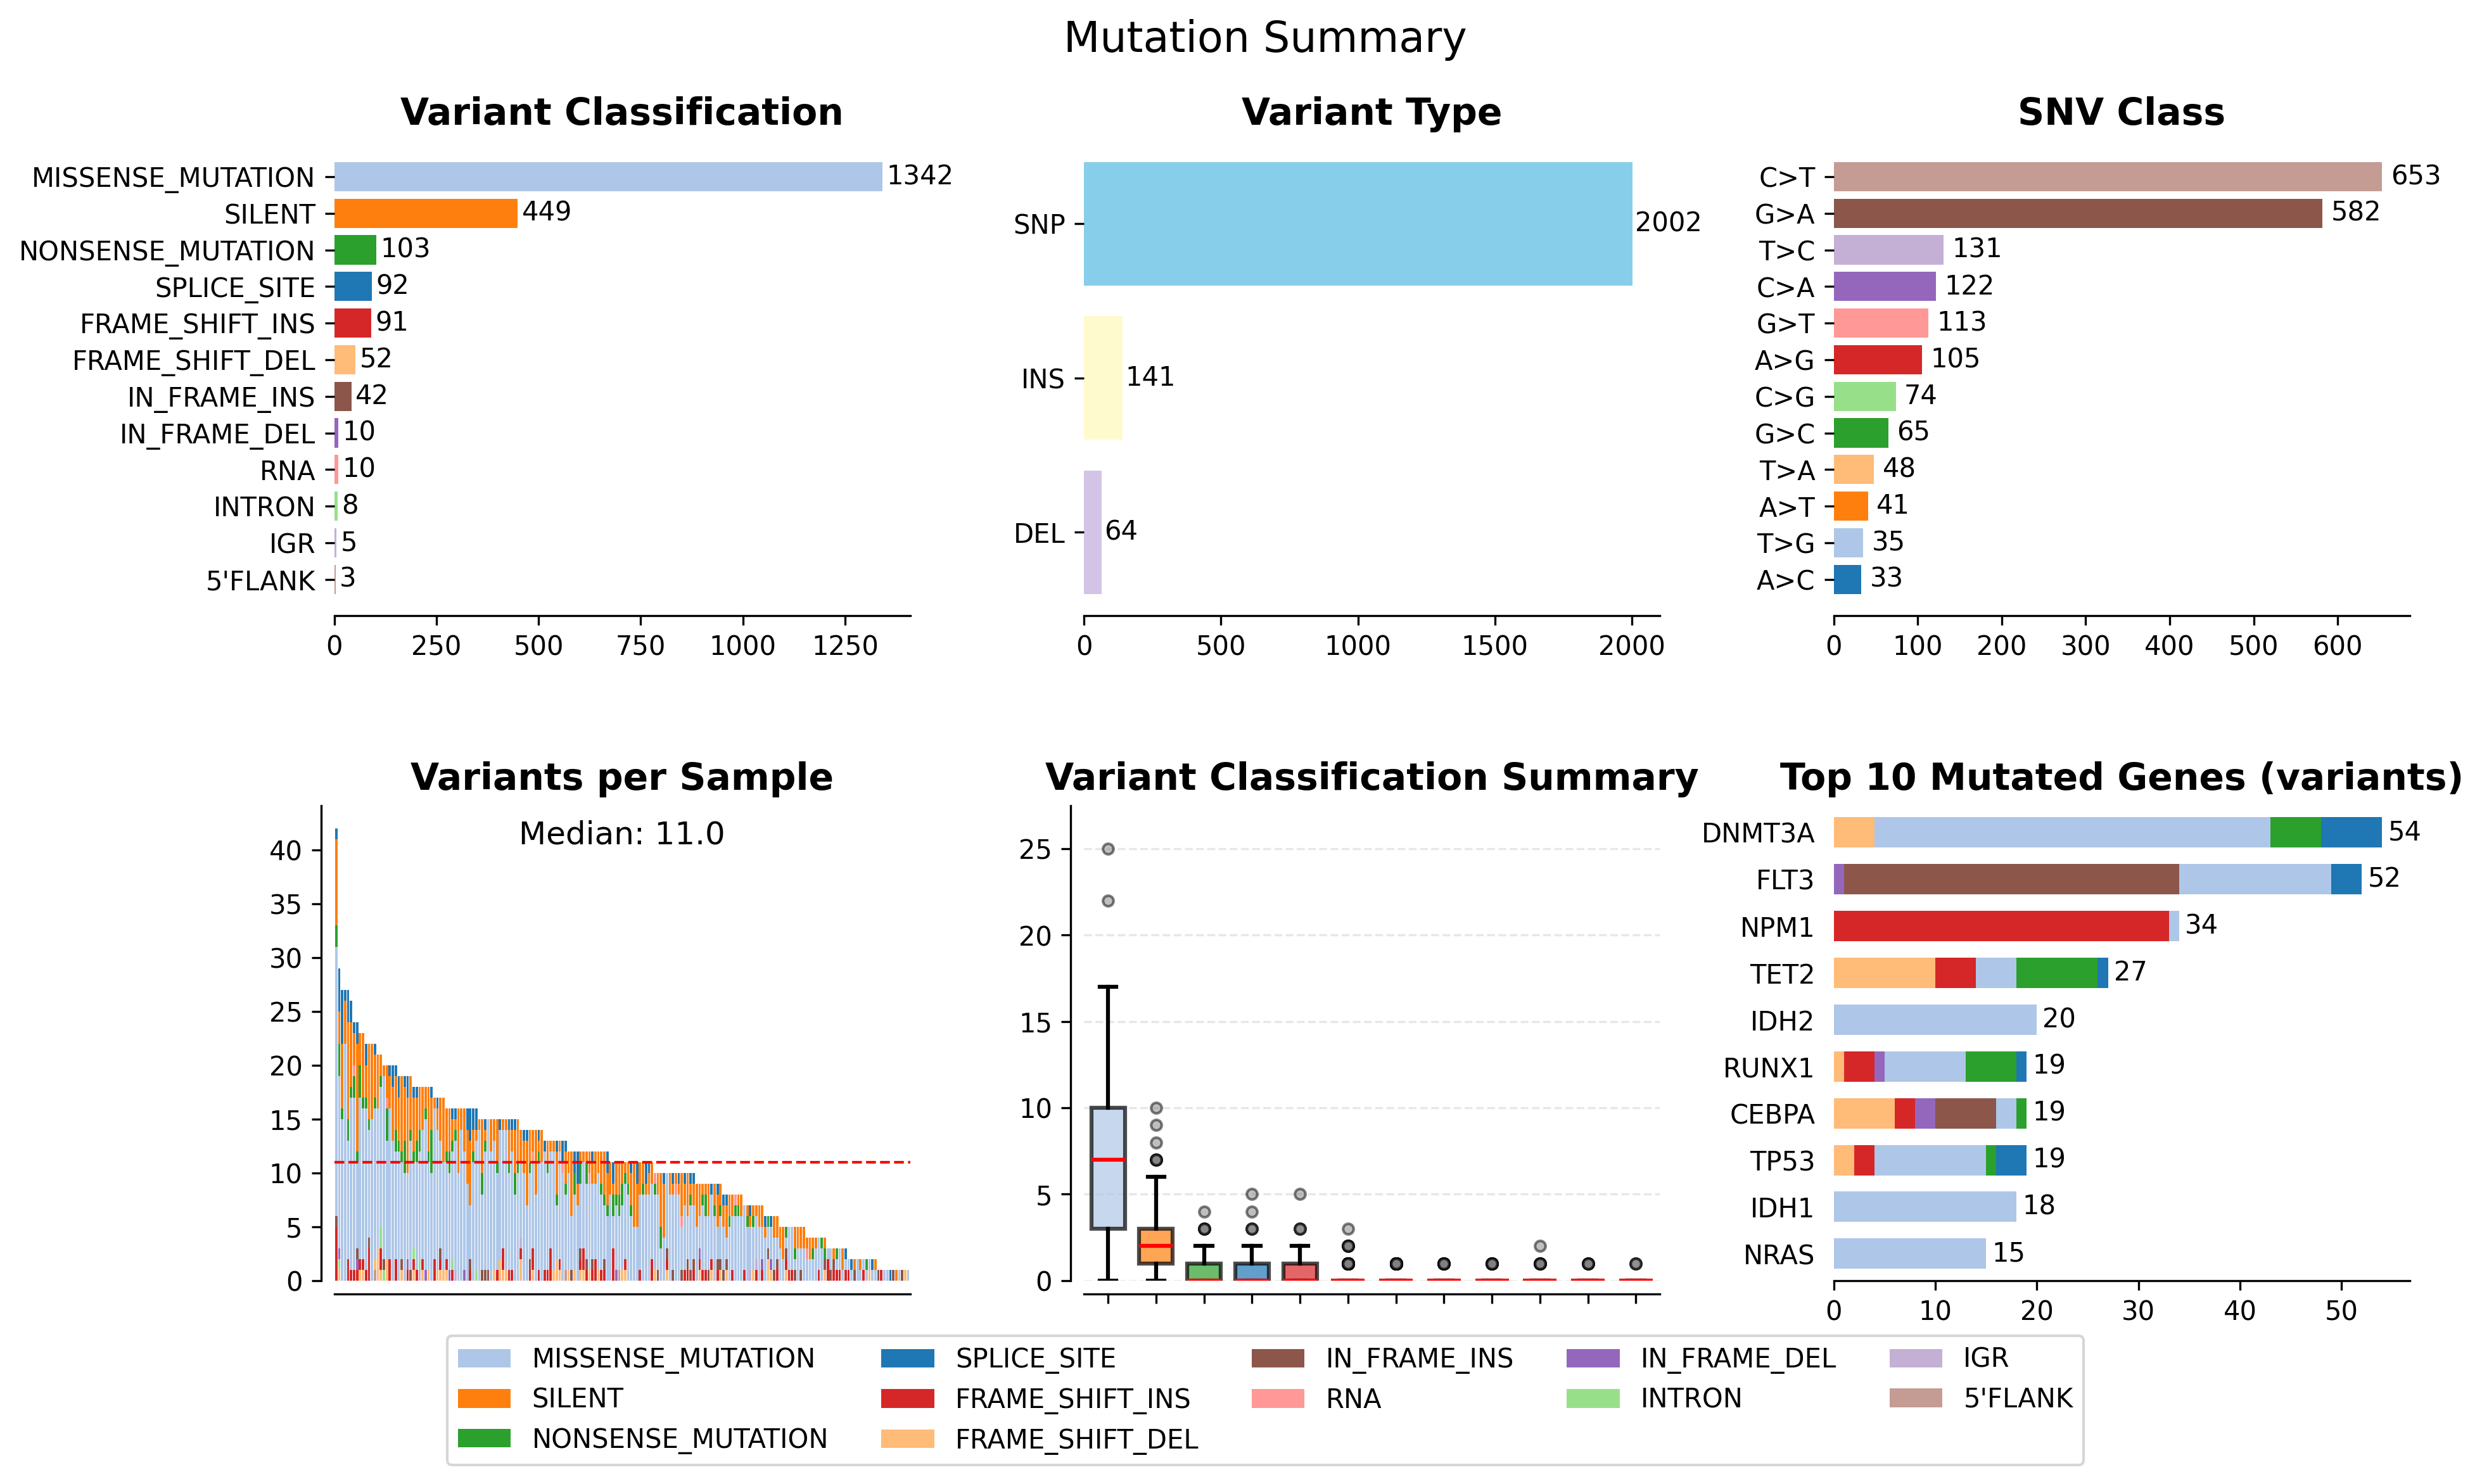

In [6]:
# py_mutation.configure_high_quality_plots()

py_mutation.summary_plot()

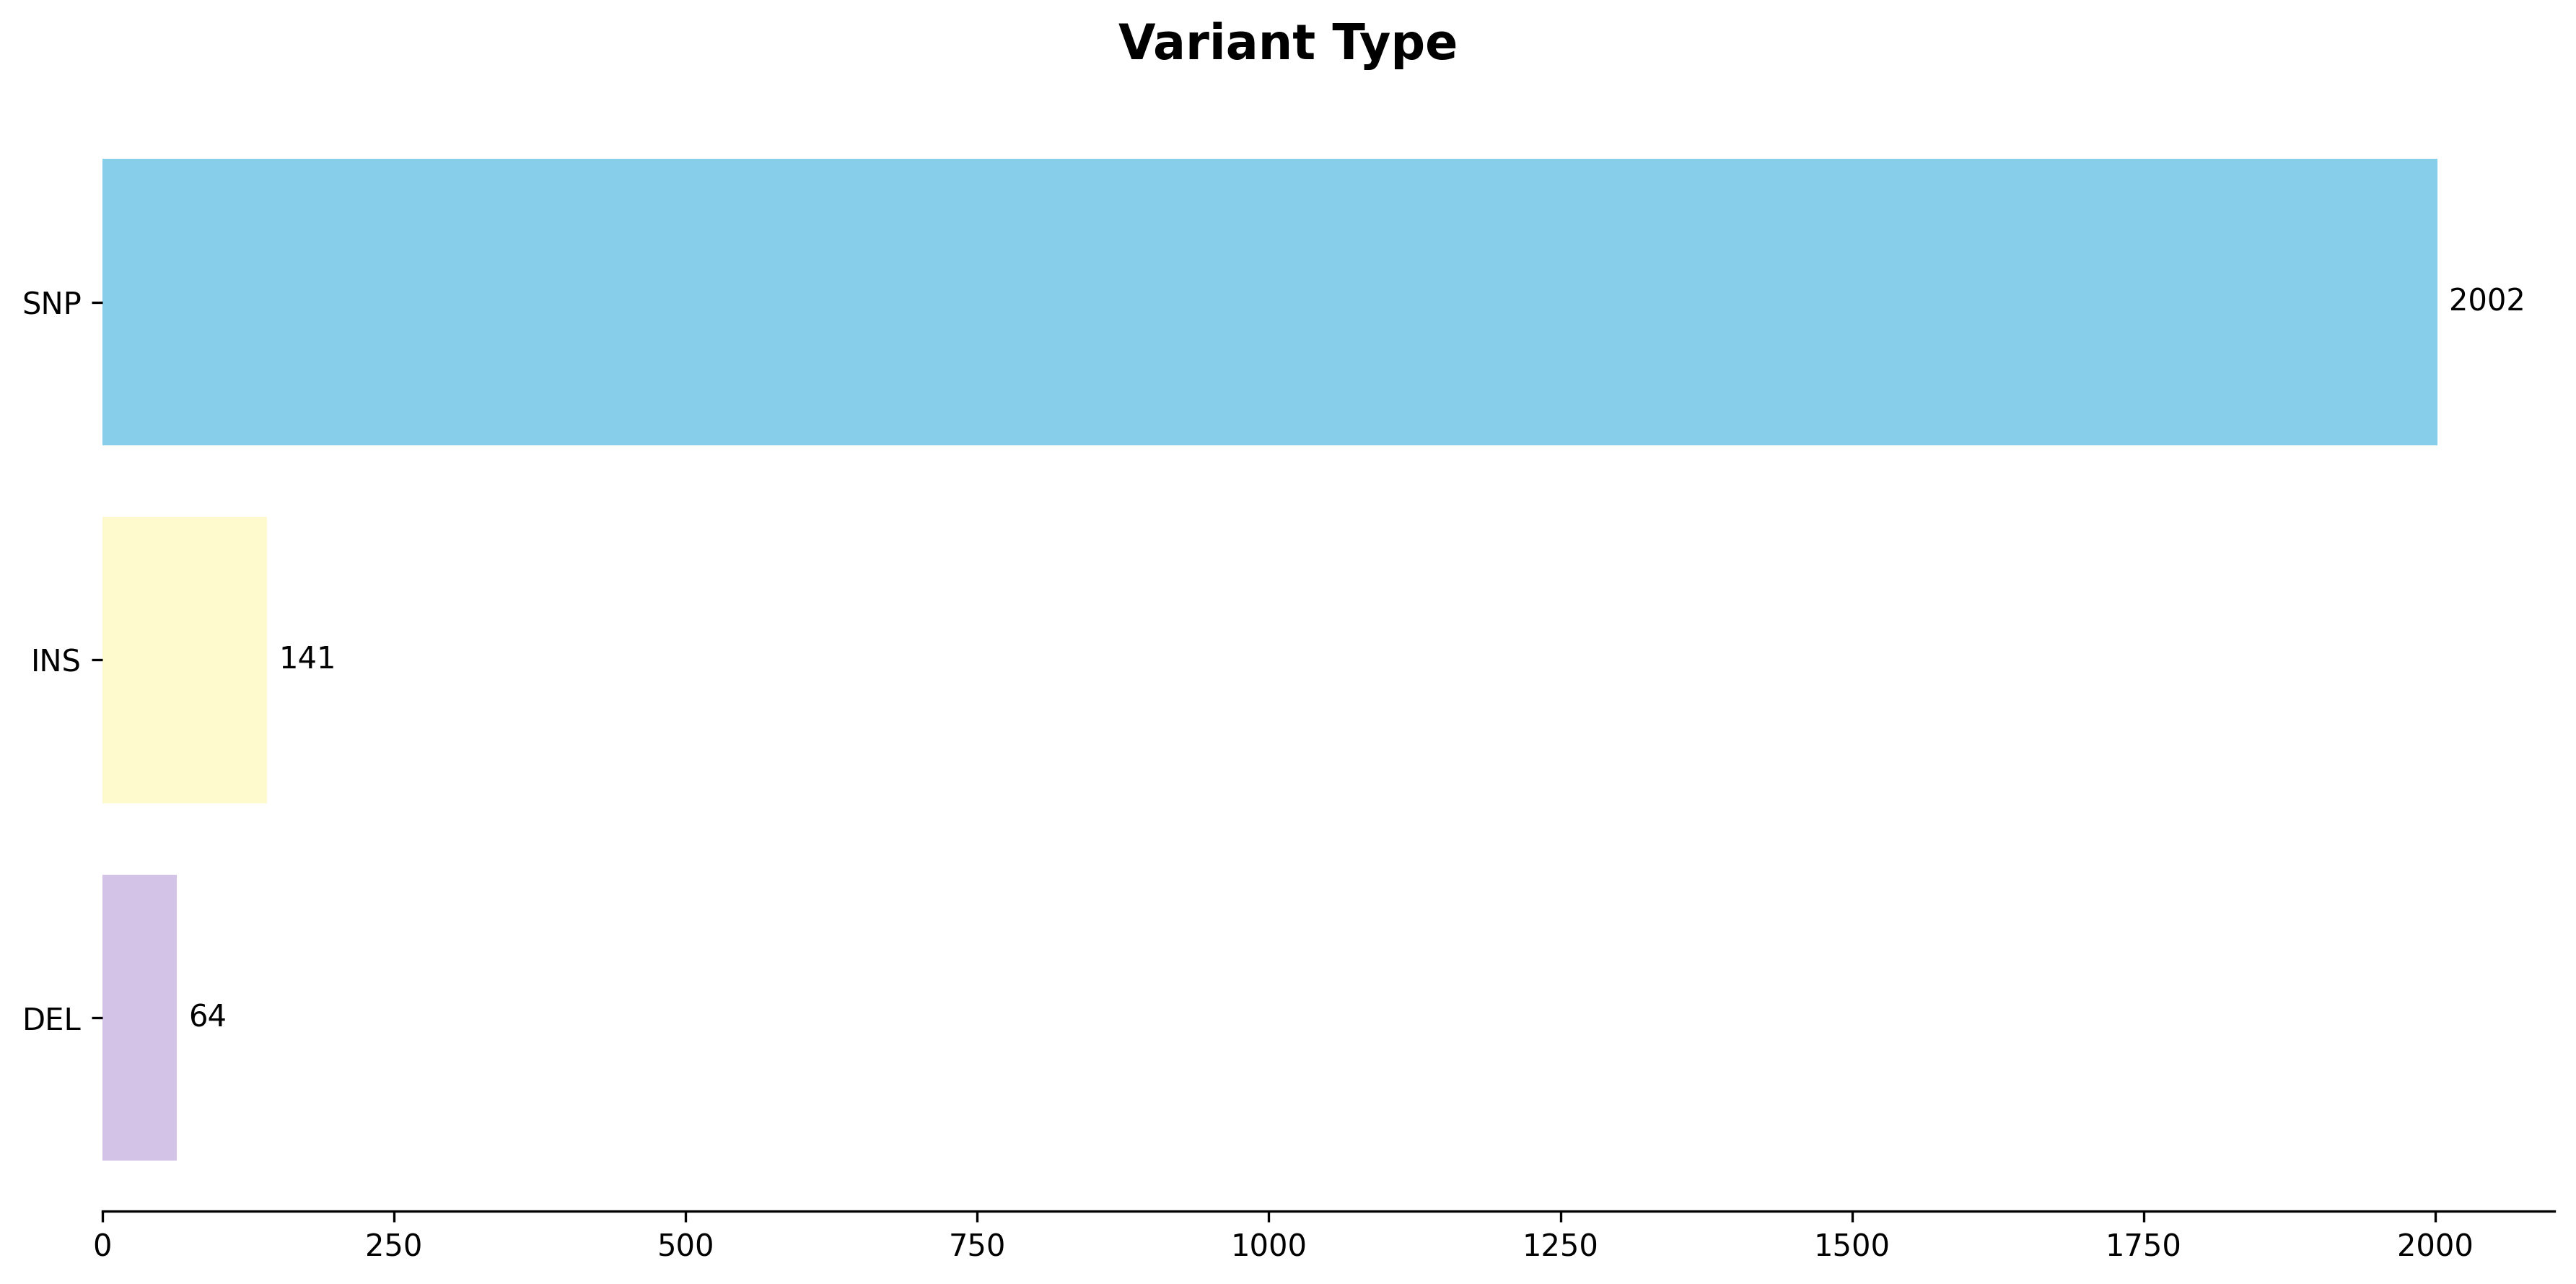

In [7]:
# py_mutation.configure_high_quality_plots()

py_mutation.variant_type_plot()

In [8]:
py_mutation.data.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,TCGA-AB-2988,TCGA-AB-2869,TCGA-AB-3009,...,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Protein_Change,i_TumorVAF_WU,i_transcript_name
0,chr17,67170917,.,T,C,.,.,T|C,T|T,T|T,...,+,SPLICE_SITE,SNP,T,T,C,TCGA-AB-2988,p.K960R,45.66,NM_080282.3
1,chr1,94490594,.,C,T,.,.,C|C,C|T,C|C,...,+,MISSENSE_MUTATION,SNP,C,C,T,TCGA-AB-2869,p.R1517H,38.12,NM_000350.2
2,chr2,169780250,.,G,A,.,.,G|G,G|G,G|A,...,+,MISSENSE_MUTATION,SNP,G,G,A,TCGA-AB-3009,p.A1283V,46.972177,NM_003742.2
3,chr16,48244997,.,G,A,.,.,G|G,G|G,G|G,...,+,SILENT,SNP,G,G,A,TCGA-AB-2830,p.I490I,34.27,NM_032583.3
4,chr17,48760974,.,C,T,.,.,C|C,C|C,C|C,...,+,MISSENSE_MUTATION,SNP,C,C,T,TCGA-AB-2887,p.P1271S,56.41,NM_003786.1


In [9]:
py_mutation.region(chrom='chr17', start=67170917, end=94490594).data.head()

2025-07-30 23:06:35,742 | INFO | pyMut.filters.genomic_range | Chromosome formatted: 'chr17' -> 'chr17'
2025-07-30 23:06:35,743 | INFO | pyMut.filters.genomic_range | Attempting to use PyArrow optimization
2025-07-30 23:06:35,748 | INFO | pyMut.filters.genomic_range | PyArrow optimization successful
2025-07-30 23:06:35,748 | INFO | pyMut.filters.genomic_range | Genomic filter applied: chr17:67170917-94490594
2025-07-30 23:06:35,748 | INFO | pyMut.filters.genomic_range | Variants before filter: 2207
2025-07-30 23:06:35,749 | INFO | pyMut.filters.genomic_range | Variants after filter: 15
2025-07-30 23:06:35,749 | INFO | pyMut.filters.genomic_range | Variants filtered out: 2192
2025-07-30 23:06:35,749 | INFO | pyMut.filters.genomic_range | Successfully filtered genomic region: chr17:67170917-94490594


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,TCGA-AB-2988,TCGA-AB-2869,TCGA-AB-3009,...,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Protein_Change,i_TumorVAF_WU,i_transcript_name
0,chr17,67170917,.,T,C,.,.,T|C,T|T,T|T,...,+,SPLICE_SITE,SNP,T,T,C,TCGA-AB-2988,p.K960R,45.66,NM_080282.3
296,chr17,80059710,.,G,A,.,.,G|G,G|G,G|G,...,+,MISSENSE_MUTATION,SNP,G,G,A,TCGA-AB-2906,p.P867S,43.3,NM_198082.2
1188,chr17,74934142,.,C,T,.,.,C|C,C|C,C|C,...,+,MISSENSE_MUTATION,SNP,C,C,T,TCGA-AB-2854,p.R501W,17.07,NM_198955.2
1601,chr17,74274238,.,T,A,.,.,T|T,T|T,T|T,...,+,MISSENSE_MUTATION,SNP,T,T,A,TCGA-AB-2899,p.D1484V,28.57,NM_032134.1
1646,chr17,74467769,.,G,A,.,.,G|G,G|G,G|G,...,+,SILENT,SNP,G,G,A,TCGA-AB-2880,p.F839F,18.37,NM_024599.2


In [10]:
py_mutation.gen_region('KRAS').data.head(10)


2025-07-30 23:06:35,895 | INFO | pyMut.filters.genomic_range | Applying gene filter for: KRAS
2025-07-30 23:06:35,896 | INFO | pyMut.filters.genomic_range | Source format detected: MAF
2025-07-30 23:06:35,896 | INFO | pyMut.filters.genomic_range | Processing MAF format - looking for Hugo_Symbol column
2025-07-30 23:06:35,897 | INFO | pyMut.filters.genomic_range | Found Hugo_Symbol column: Hugo_Symbol
2025-07-30 23:06:35,901 | INFO | pyMut.filters.genomic_range | Gene filter applied: KRAS
2025-07-30 23:06:35,901 | INFO | pyMut.filters.genomic_range | Variants before filter: 2207
2025-07-30 23:06:35,902 | INFO | pyMut.filters.genomic_range | Variants after filter: 8
2025-07-30 23:06:35,902 | INFO | pyMut.filters.genomic_range | Variants filtered out: 2199
2025-07-30 23:06:35,903 | INFO | pyMut.filters.genomic_range | Successfully filtered data for gene: KRAS


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,TCGA-AB-2988,TCGA-AB-2869,TCGA-AB-3009,...,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Protein_Change,i_TumorVAF_WU,i_transcript_name
1060,chr12,25380275,.,T,A,.,.,T|T,T|T,T|T,...,+,MISSENSE_MUTATION,SNP,T,T,A,TCGA-AB-2826,p.Q61H,24.53,NM_033360.3
1061,chr12,25398284,.,C,A,.,.,C|C,C|C,C|C,...,+,MISSENSE_MUTATION,SNP,C,C,A,TCGA-AB-2861,p.G12V,30.0,NM_033360.3
1062,chr12,25380282,.,G,T,.,.,G|G,G|G,G|G,...,+,MISSENSE_MUTATION,SNP,G,G,T,TCGA-AB-2864,p.A59E,40.62,NM_033360.3
1063,chr12,25398284,.,C,T,.,.,C|C,C|C,C|C,...,+,MISSENSE_MUTATION,SNP,C,C,T,TCGA-AB-2865,p.G12D,14.89,NM_033360.3
1064,chr12,25398211,.,T,C,.,.,T|T,T|T,T|T,...,+,MISSENSE_MUTATION,SNP,T,T,C,TCGA-AB-2917,p.I36M,60.29,NM_033360.3
1065,chr12,25398284,.,C,T,.,.,C|C,C|C,C|C,...,+,MISSENSE_MUTATION,SNP,C,C,T,TCGA-AB-2929,p.G12D,69.81,NM_033360.3
1066,chr12,25378562,.,C,T,.,.,C|C,C|C,C|C,...,+,MISSENSE_MUTATION,SNP,C,C,T,TCGA-AB-2966,p.A146T,39.08,NM_033360.3
1067,chr12,25398281,.,C,T,.,.,C|C,C|C,C|C,...,+,MISSENSE_MUTATION,SNP,C,C,T,TCGA-AB-2987,p.G13D,31.14,NM_033360.3
